In [2]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn import datasets
from skimage import exposure
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import pickle
import seaborn as sns
import scikitplot as skplt
from sklearn import linear_model


## Project 2A: MNIST

In this assignment, you will be working with MNIST dataset to train a handwriting digit classifier.

<img src="mnistExamples.png">

### Part I: kNN classifiers for MNIST 

You will train kNN classifiers for multiple values of $k$ and then choose the classifer with the lowest validation error as your final classifier.

#### 1. Prepare the train/validate/test data.
First step, split the dataset into 60% training data, 20% validation data, and 20% test data

In [3]:
# load the MNIST digits dataset
mnist = pickle.load(open("mnist.p", "rb"))

#shuffle the data and the target to make it more reliable
suffled_mnist_data, suffled_mnist_target = shuffle(mnist.data, mnist.target) # shuffle dataset (which is ordered!)

# split data for data testing and 20% for data testing
(train_data, test_data, train_labels, test_labels) = train_test_split(np.array(suffled_mnist_data),
                                                                      suffled_mnist_target,
                                                                      test_size = 0.2,
                                                                      random_state= 42
                                                                     )
# 20 for validation and 60 for train
(train_data, val_data, train_labels, val_labels) = train_test_split(np.array(train_data),
                                                                    train_labels,
                                                                    test_size = 0.2, 
                                                                    random_state = 42
                                                                   )

In [4]:
# Check the size of each seperation
print("training data points: {}".format(len(train_labels)))
print("validation data points: {}".format(len(val_labels)))
print("testing data points: {}".format(len(test_labels)))



training data points: 44800
validation data points: 11200
testing data points: 14000


#### 2. Train kNN classifiers
For each value of $k \in [2,20]$, train a kNN classifier with Euclidean distance (L1). Plot out validation error for $k$. **Plot out the validation error for each value of k.** 

In [ ]:
# This is out range of k starting from 2 to 20
kVals = range(3,21, 2)
accuracies = []
 

    
    
# loop over various values of `k` for the k-Nearest Neighbor classifier ignoring the even number 
####################################################################################################################
# WARNING ! If you ran this, it's going to take write 30 - 40 mins and comsume 100 ++ of you CPU
# K = 3 is the best result. trust me !
####################################################################################################################

for k in range(3, 21, 2):
    #Building up the model with test values
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_data, train_labels)
     
    # validiate the model with validate set of data
    accuracy_score = model.score(val_data, val_labels)
    print("k=%d, accuracy=%.2f%%" % (k, accuracy_score * 100))
    accuracies.append(accuracy_score)
 
# find the value of k that has the largest accuracy
inx_max = int(np.argmax(accuracies))
print("The highest accuracy is %.2f%% occuring when k = %d" % (
	accuracies[inx_max] * 100, kVals[inx_max]))

k=3, accuracy=96.82%
k=5, accuracy=96.78%
k=7, accuracy=96.66%


#### 3. Test and analyze 
Choose the classifier with lowest validation error from previous part. Calculate the **confusion matrix**, along with the test accuracy and, for each class, test precision/recall as shown in the example below. You don't have to match the output exactly but you need to show same amount of information 

<img width="400px" src="mnist_conf_mat.png">


In [5]:
#Since the best k thats give the best accuracy is 3, we use that classifier to test 

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_data, train_labels)
predictions = model.predict(test_data)



In [6]:
report = classification_report(test_labels, predictions, output_dict=True)

In [7]:
df = pd.DataFrame(report)
df.drop(["f1-score", "support"], inplace=True ,axis=0)
df.drop(["micro avg", "macro avg", "weighted avg"], axis=1, inplace=True)

In [8]:

df = (df*100)
df = df.astype(int)

,0,1,2,3,4,5,6,7,8,9
precision,97,96,98,95,97,96,97,96,98,95
recall,99,99,95,97,96,94,98,97,92,96


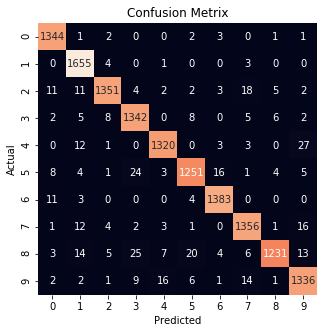

In [59]:

conf_mat = confusion_matrix(test_labels, predictions)
fig, ax = plt.subplots(1,1, figsize=(5,5))
# skplt.metrics.plot_confusion_matrix(test_labels, predictions, ax=ax[1])


sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, ax=ax)
ax.set_title('Confusion Metrix')
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")
df


Also, show example images of **mistakes** your classifier made.

<img width="200px" src="mistakes.png">



Text(0.5, 0.98, '2 misclassified as 7')

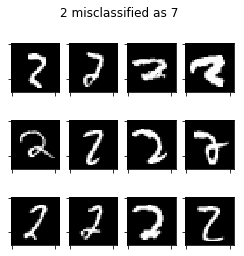

In [68]:
lt = []
limit = 12
indx = 0
while(limit > 0 and indx < len(test_data)):
    if (test_labels[indx] == '2' and predictions[indx] == '7'):
        lt.append(test_data[indx])
        limit -= 1
        indx += 1
    indx += 1

len(lt)
fig,ax = plt.subplots (3,4, figsize=(4,4))
indx = 0
for row in range(3):
    for col in range(4):
        ax[row][col].imshow(np.reshape(lt[indx],(28,28)),cmap='gray')
        ax[row][col].set_yticklabels([])
        ax[row][col].set_xticklabels([])
        
        indx+= 1
fig.suptitle('2 misclassified as 7', fontsize=12)

### Part II: Logistic Regression, Decision Tree, Perceptron and SVM 

In this part, we consider a binary classification problem, "odd vs even". You will train a **logistic regression classifier**, a **decision tree**, a **perceptron** and a **SVM** that predicts "even" or "odd" given an instance from MNIST dataset.

#### 1. Prepare the training data and train the classifier

In [76]:
# load the MNIST digits dataset
mnist = pickle.load(open("mnist.p", "rb"))

# 1 is odd 0 is even
odd_even = np.array([ int(x)%2 for x in mnist.target])
#shuffle the data and the target to make it more reliable
suffled_mnist_data, suffled_mnist_target, suffled_mnist_odd_even = shuffle(mnist.data, mnist.target, odd_even) # shuffle dataset (which is ordered!)

# one more data odd or even



# split data for data testing and 20% for data testing


(train_data, test_data, train_odd_even, test_odd_even) = train_test_split(np.array(suffled_mnist_data),
                                                                      suffled_mnist_odd_even,
                                                                      test_size = 0.2,
                                                                      random_state= 42
                                                                     )
# 20 for validation and 60 for train
(train_data, val_data, train_odd_even, val_odd_even) = train_test_split(np.array(train_data),
                                                                    train_odd_even,
                                                                    test_size = 0.2, 
                                                                    random_state = 42
                                                                   )

In [84]:
print(train_data.shape)
print(train_odd_even.shape)

(44800, 784)
(44800,)


In [85]:
#1 . Use Logistic regession
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=100000)

LRmodel.fit(train_data, train_odd_even)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

#### 2. Test your classifiers

For each classifier, calculate the **confusion matrix**, along with the **test accuracy/precision/recall/f1-score** of your classifier. You only need to do this for 1 test set.


Accuracy is 0.8950892857142857


,0,1
precision,89,89
recall,89,89


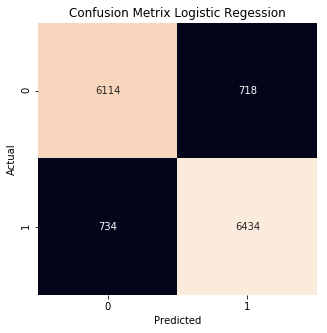

In [115]:
predictions = LRmodel.predict(test_data)

conf_mat = confusion_matrix(test_odd_even, predictions)
fig, ax = plt.subplots(1,1, figsize=(5,5))
# skplt.metrics.plot_confusion_matrix(test_labels, predictions, ax=ax[1])

sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, ax=ax)
ax.set_title('Confusion Metrix Logistic Regession')
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")


report = classification_report(test_odd_even, predictions, output_dict=True)
df = pd.DataFrame(report)
df.drop(["f1-score", "support"], inplace=True ,axis=0)
df.drop(["micro avg", "macro avg", "weighted avg"], axis=1, inplace=True)
print("Accuracy is " + str(LRmodel.score(val_data, val_odd_even)))
df = (df*100)
df = df.astype(int)
df


Accuracy is 0.8950892857142857


,0,1
precision,81,89
recall,89,81


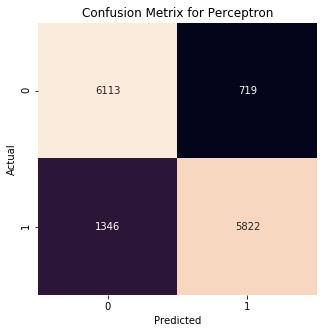

In [116]:
from sklearn import linear_model
ppn = linear_model.Perceptron(random_state=0, max_iter=100, tol=1e-6)
ppn.fit(train_data, train_odd_even)

predictions = ppn.predict(test_data)

conf_mat = confusion_matrix(test_odd_even, predictions)
fig, ax = plt.subplots(1,1, figsize=(5,5))
# skplt.metrics.plot_confusion_matrix(test_labels, predictions, ax=ax[1])


sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, ax=ax)
ax.set_title('Confusion Metrix for Perceptron')
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

report = classification_report(test_odd_even, predictions, output_dict=True)
df = pd.DataFrame(report)
df.drop(["f1-score", "support"], inplace=True ,axis=0)
df.drop(["micro avg", "macro avg", "weighted avg"], axis=1, inplace=True)
print("Accuracy is " + str(LRmodel.score(val_data, val_odd_even)))
df = (df*100)
df = df.astype(int)
df

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(train_data, train_odd_even)



#### 3. Selected mistakes
Display some examples of mistakes made by each of your classifiers.

#### 4. Cross validation

Perform cross validation on each classifier and report the average accuracy and its standard deviation. Use a boxplot to compare different classifiers.